In [60]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('SBAnational.csv')

df.head(5)


/tmp/ipykernel_28438/3013808899.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [61]:
df.shape

(899164, 27)

In [62]:
df['BalanceGross'].unique()

array(['$0.00 ', '$12,750.00 ', '$827,875.00 ', '$25,000.00 ',
       '$37,100.00 ', '$43,127.00 ', '$84,617.00 ', '$1,760.00 ',
       '$115,820.00 ', '$996,262.00 ', '$395,476.00 ', '$41,509.00 ',
       '$600.00 ', '$9,111.00 ', '$96,908.00 '], dtype=object)

In [63]:
# 1 useless 5
# 2 non
# city et state oui 
# je sais pas bank name, fiscal year of com
# 1 2 6 10 7 15 16 17 21 22 25 26

#c

In [64]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [65]:
df = df.drop(['LoanNr_ChkDgt','Name','City','Zip','Bank', 'ApprovalDate', 'ApprovalFY','ChgOffDate','DisbursementDate', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr' 	], axis=1)

In [66]:
df.columns

Index(['State', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'MIS_Status', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [67]:


df.isna().sum()

State              14
BankState        1566
NAICS               0
Term                0
NoEmp               0
NewExist          136
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4528
LowDoc           2582
MIS_Status       1997
GrAppv              0
SBA_Appv            0
dtype: int64

In [68]:
df = df.dropna()

In [69]:
df.isna().sum()

State            0
BankState        0
NAICS            0
Term             0
NoEmp            0
NewExist         0
CreateJob        0
RetainedJob      0
FranchiseCode    0
UrbanRural       0
RevLineCr        0
LowDoc           0
MIS_Status       0
GrAppv           0
SBA_Appv         0
dtype: int64

In [70]:
df.shape


(888421, 15)

In [71]:
df.duplicated().sum()


9319

In [72]:
df = df.drop_duplicates()
df.shape

(879102, 15)

In [73]:
df.head()

,State,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,"$60,000.00","$48,000.00"
1,IN,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,"$40,000.00","$32,000.00"
2,IN,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,"$287,000.00","$215,250.00"
3,OK,OK,0,60,2,1.0,0,0,1,0,N,Y,P I F,"$35,000.00","$28,000.00"
4,FL,FL,0,240,14,1.0,7,7,1,0,N,N,P I F,"$229,000.00","$229,000.00"


In [74]:
#enlever les lignes ou le naics est à 0
nombre_zeros_naics = (df['NAICS'] == 0).sum()
nombre_zeros_naics

194239

In [75]:
#enlever les lignes ou le naics est à 0
#df = df[df['NAICS'] != 0]

In [76]:
df.shape

(879102, 15)

In [77]:
df.dtypes

State             object
BankState         object
NAICS              int64
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr         object
LowDoc            object
MIS_Status        object
GrAppv            object
SBA_Appv          object
dtype: object

In [78]:
#replace dollar et convertir en float
df['GrAppv'] = df['GrAppv'].replace('[\$,]', '', regex=True).astype(float)
df['SBA_Appv'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)

In [79]:
df.to_csv('dataset_test.csv', index=False)
df.head()

,State,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
3,OK,OK,0,60,2,1.0,0,0,1,0,N,Y,P I F,35000.0,28000.0
4,FL,FL,0,240,14,1.0,7,7,1,0,N,N,P I F,229000.0,229000.0


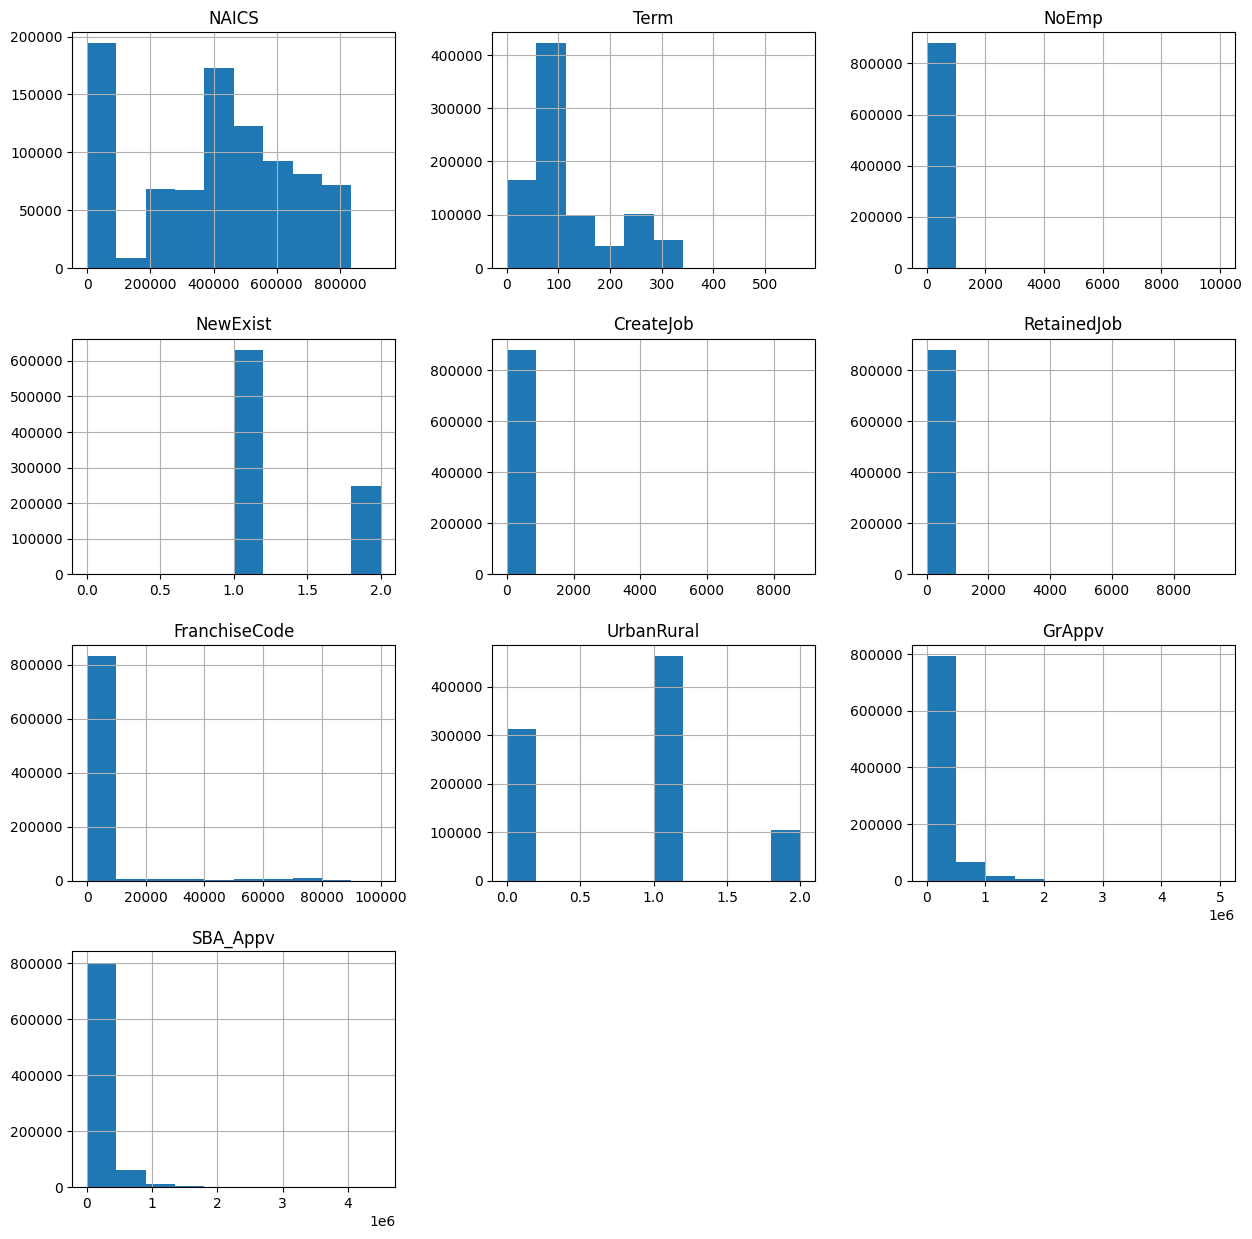

In [80]:
df.hist(figsize = (15,15));

In [81]:
#target proportion 
df['MIS_Status'].value_counts()


MIS_Status
P I F     722791
CHGOFF    156311
Name: count, dtype: int64

<Axes: >

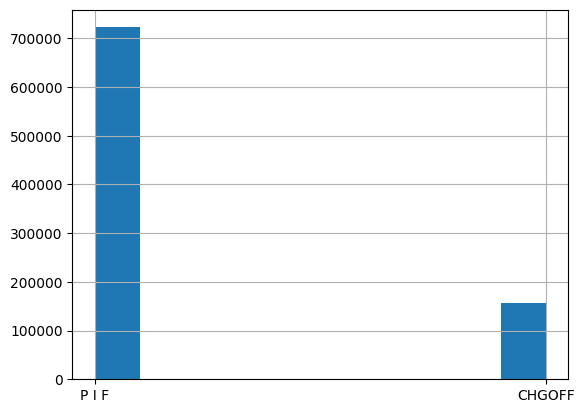

In [82]:
df['MIS_Status'].hist()

In [83]:
df.head()

,State,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
3,OK,OK,0,60,2,1.0,0,0,1,0,N,Y,P I F,35000.0,28000.0
4,FL,FL,0,240,14,1.0,7,7,1,0,N,N,P I F,229000.0,229000.0


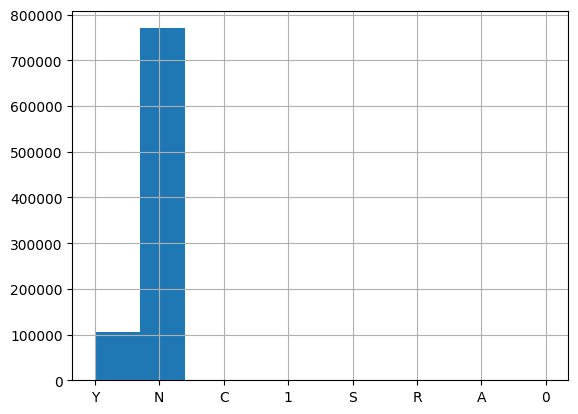

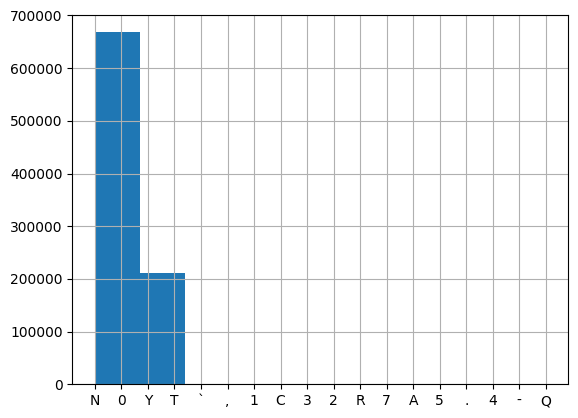

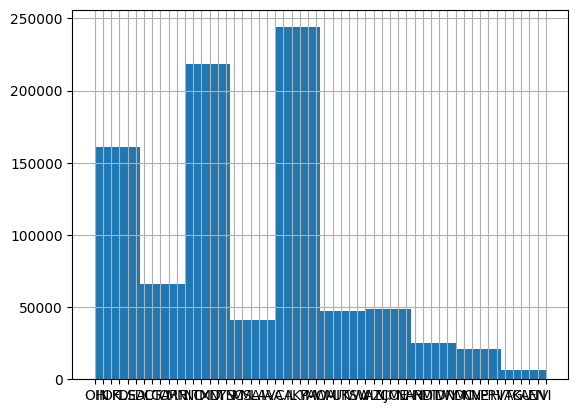

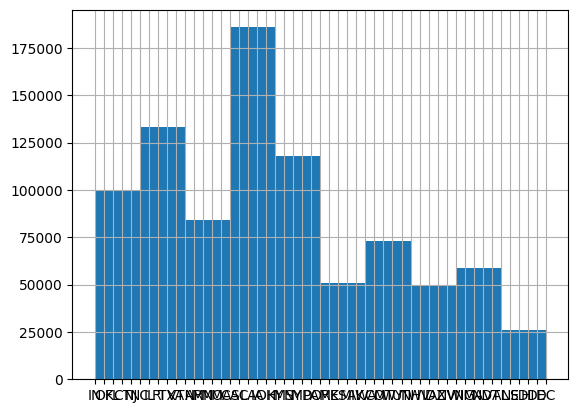

In [84]:
cat_col = ['LowDoc', 'RevLineCr', 'BankState', 'State']

for col in cat_col:
    df[col].hist()
    
    plt.show()

In [85]:
cat_col = ['LowDoc', 'RevLineCr', 'BankState', 'State']

for col in cat_col:
    print(df[col].value_counts())
    

LowDoc
N    770174
Y    105765
0      1236
C       757
S       601
A       494
R        74
1         1
Name: count, dtype: int64
RevLineCr
N    412185
0    255880
Y    195843
T     15129
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64
BankState
CA    115075
NC     77653
IL     64383
OH     57456
SD     50496
TX     46764
RI     43135
NY     38684
VA     28733
DE     24387
MN     19681
UT     18806
PA     16780
WI     15153
MO     14595
GA     13590
FL     13568
MA     13463
AL     11941
OR     11131
WA     10492
CO     10396
CT      9793
IA      9667
NJ      9261
KS      8714
MT      7704
IN      7518
SC      7419
MI      7247
OK      7205
MD      6869
NH      6662
AR      6174
MS      5785
TN      5541
NE      5256
ND      5006
LA      4982
VT      4676
NM      4331
NV      4298
KY      4286
ID      4257
DC      3957
AZ      3905
ME      363

In [86]:
df2 = df.copy()

df2['MIS_Status'] = df2['MIS_Status'].replace({'P I F': 1, 'CHGOFF': 0})

df2.head()

,State,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,OH,451120,84,4,2.0,0,0,1,0,N,Y,1,60000.0,48000.0
1,IN,IN,722410,60,2,2.0,0,0,1,0,N,Y,1,40000.0,32000.0
2,IN,IN,621210,180,7,1.0,0,0,1,0,N,N,1,287000.0,215250.0
3,OK,OK,0,60,2,1.0,0,0,1,0,N,Y,1,35000.0,28000.0
4,FL,FL,0,240,14,1.0,7,7,1,0,N,N,1,229000.0,229000.0
